# Transport 

In [377]:
#Import libraries
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb
import calendar
import plotly.express as px

In [378]:
from PIL import Image

(-0.5, 465.5, 406.5, -0.5)

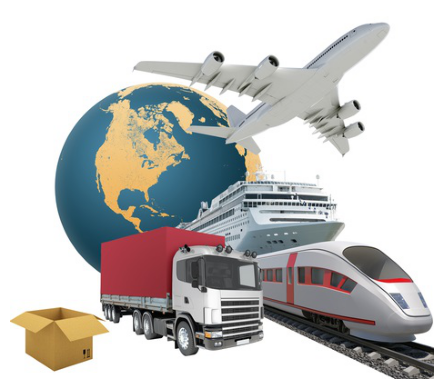

In [379]:
imagen= mpimg.imread('Transport.jpg')
plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [380]:
#Import DataBases

IRL= pd.read_csv("Plublic Transport Ireland.csv")
IRLuas= pd.read_csv("TOA11 - Luas Passenger Numbers Ireland.csv")
IRLFM=pd.read_csv("Trail Trafict Ireland.csv")

#Additional Countries
NRW= pd.read_csv("Bus Norway.csv")
NRWW = pd.read_excel("NORWAY.xlsx")
NZL= pd.read_csv("PT005 - Public transport boardings by mode New Zealand.csv")

# Data cleaning

In [381]:
#First Database
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [382]:
IRL.info

<bound method DataFrame.info of      STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
...        ...                 ...       ...           ...           ...   
1019  THA25C01  Passenger Journeys   2023W43  2023 Week 43            40   
1020  THA25C01  Passenger Journeys   2023W44  2023 Week 44            10   
1021  THA25C01  Passenger Journeys   2023W44  2023 Week 44            20   
1022  THA25C01  Passenger Journeys   2023W44  2023 Week 44            30   
1023  THA25C01  Passenger Journeys   2023W44  2023 Week 44            40   

                         Mode of Transport    UNIT     

In [383]:
IRL.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

# Missing information

In [384]:
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [385]:
IRL.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [386]:
IRL.fillna(0, inplace=True)
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [387]:
IRL.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

In [388]:
print(IRL['Mode of Transport'].head())

0                        Dublin Metro Bus
1             Bus, excluding Dublin Metro
2                                    Rail
3    All public transport, excluding LUAS
4                        Dublin Metro Bus
Name: Mode of Transport, dtype: object


In [389]:
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [390]:
IRL= IRL[IRL['Mode of Transport'] != 'All public transport, excluding LUAS']
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0
...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 Week 43,20,"Bus, excluding Dublin Metro",Number,974091.0
1018,THA25C01,Passenger Journeys,2023W43,2023 Week 43,30,Rail,Number,888050.0
1020,THA25C01,Passenger Journeys,2023W44,2023 Week 44,10,Dublin Metro Bus,Number,3043578.0
1021,THA25C01,Passenger Journeys,2023W44,2023 Week 44,20,"Bus, excluding Dublin Metro",Number,811636.0


In [391]:
print(IRL['Mode of Transport'].head())

0               Dublin Metro Bus
1    Bus, excluding Dublin Metro
2                           Rail
4               Dublin Metro Bus
5    Bus, excluding Dublin Metro
Name: Mode of Transport, dtype: object


# Group by month 

In [392]:
IRL['Year'] = IRL['Week'].str.slice(0, 4)  # to get the first 4 characters (year)
IRL['Week_Number'] = IRL['Week'].str.slice(-2)  # Last 2 characters (week number)
IRL['Week_Number'] = IRL['Week_Number'].astype(int)  # Convert to integer type
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0,2019,1
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0,2019,1
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0,2019,2
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2
...,...,...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 Week 43,20,"Bus, excluding Dublin Metro",Number,974091.0,2023,43
1018,THA25C01,Passenger Journeys,2023W43,2023 Week 43,30,Rail,Number,888050.0,2023,43
1020,THA25C01,Passenger Journeys,2023W44,2023 Week 44,10,Dublin Metro Bus,Number,3043578.0,2023,44
1021,THA25C01,Passenger Journeys,2023W44,2023 Week 44,20,"Bus, excluding Dublin Metro",Number,811636.0,2023,44


In [393]:
IRL['Week'] = IRL['Year'].astype(str) + ' ' + IRL['Week_Number'].astype(str)
IRL['Date'] = pd.to_datetime(IRL['Week'] + ' 0', format='%Y %U %w')
IRL['Month'] = IRL['Date'].dt.month.apply(lambda x: calendar.month_name[x])
IRL

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number,Date,Month
0,THA25C01,Passenger Journeys,2019W01,2019 1,10,Dublin Metro Bus,Number,1987891.0,2019,1,2019-01-06,January
1,THA25C01,Passenger Journeys,2019W01,2019 1,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1,2019-01-06,January
2,THA25C01,Passenger Journeys,2019W01,2019 1,30,Rail,Number,0.0,2019,1,2019-01-06,January
4,THA25C01,Passenger Journeys,2019W02,2019 2,10,Dublin Metro Bus,Number,2709579.0,2019,2,2019-01-13,January
5,THA25C01,Passenger Journeys,2019W02,2019 2,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2,2019-01-13,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,THA25C01,Passenger Journeys,2023W43,2023 43,20,"Bus, excluding Dublin Metro",Number,974091.0,2023,43,2023-10-22,October
1018,THA25C01,Passenger Journeys,2023W43,2023 43,30,Rail,Number,888050.0,2023,43,2023-10-22,October
1020,THA25C01,Passenger Journeys,2023W44,2023 44,10,Dublin Metro Bus,Number,3043578.0,2023,44,2023-10-29,October
1021,THA25C01,Passenger Journeys,2023W44,2023 44,20,"Bus, excluding Dublin Metro",Number,811636.0,2023,44,2023-10-29,October


In [394]:
IRL_Total = IRL.groupby(['Year','Mode of Transport', 'Month']).agg({'VALUE': 'sum'}).reset_index()
IRL_Total

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
169,2023,Rail,June,3537628.0
170,2023,Rail,March,3129610.0
171,2023,Rail,May,3630558.0
172,2023,Rail,October,4525977.0


# Second database 

In [395]:
IRLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [396]:
print(IRLuas['Statistic Label'].head())

0    Red line
1    Red line
2    Red line
3    Red line
4    Red line
Name: Statistic Label, dtype: object


In [397]:
IRL_2 = IRLuas[['Statistic Label','Year','Month','VALUE']]
IRL_2

,Statistic Label,Year,Month,VALUE
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562
2,Red line,2018,March,1661098
3,Red line,2018,April,1794424
4,Red line,2018,May,1934553
...,...,...,...,...
190,All Luas lines,2022,September,3811093
191,All Luas lines,2022,October,4219124
192,All Luas lines,2022,November,4375705
193,All Luas lines,2022,December,4030698


In [398]:
IRL_2=IRL_2[IRL_2["Year"].astype("int64")>=2019]
IRL_2.head()

,Statistic Label,Year,Month,VALUE
13,Red line,2019,January,1747263
14,Red line,2019,February,1846358
15,Red line,2019,March,2052087
16,Red line,2019,April,1916485
17,Red line,2019,May,1992879


In [399]:
IRL_T= IRL_2[IRL_2['Statistic Label'] == 'All Luas lines']

In [400]:
IRL_T= IRL_T[IRL_T['Month'] != 'All months']

In [401]:
IRL_T=IRL_T.rename (columns= {'Statistic Label':'Mode of Transport'})
IRL_T.head()

,Mode of Transport,Year,Month,VALUE
143,All Luas lines,2019,January,3658484
144,All Luas lines,2019,February,3727609
145,All Luas lines,2019,March,4069124
146,All Luas lines,2019,April,3826763
147,All Luas lines,2019,May,4003472


# Concatenate 2 dataframes

In [402]:
Ireland = pd.concat([IRL_Total, IRL_T], ignore_index=True)
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
217,2022,All Luas lines,August,3292231.0
218,2022,All Luas lines,September,3811093.0
219,2022,All Luas lines,October,4219124.0
220,2022,All Luas lines,November,4375705.0


In [403]:
Ireland.isnull()

,Year,Mode of Transport,Month,VALUE
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
217,False,False,False,False
218,False,False,False,False
219,False,False,False,False
220,False,False,False,False


In [404]:
Ireland.isnull().sum()

Year                 0
Mode of Transport    0
Month                0
VALUE                0
dtype: int64

In [405]:
Transport_M = Ireland['Mode of Transport'].value_counts()
Transport_M

Bus, excluding Dublin Metro    58
Dublin Metro Bus               58
Rail                           58
All Luas lines                 48
Name: Mode of Transport, dtype: int64

In [406]:
mapping = {
    'All Luas lines': 'Luas',
    'Bus, excluding Dublin Metro':'Bus',
    'Dublin Metro Bus': 'Metro Bus',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [407]:
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,Bus,April,2681041.0
1,2019,Bus,August,2684969.0
2,2019,Bus,December,3633236.0
3,2019,Bus,February,2783538.0
4,2019,Bus,January,2485599.0
...,...,...,...,...
217,2022,Luas,August,3292231.0
218,2022,Luas,September,3811093.0
219,2022,Luas,October,4219124.0
220,2022,Luas,November,4375705.0


In [408]:
def Quarter(month):
    if month in ['January', 'February', 'March']:
        return 'K1'
    elif month in ['April','May', 'June']:
        return 'K2'
    elif month in ['July', 'August','September']:
        return 'K3'
    elif month in ['October', 'November', 'December']:
        return 'K4'
Ireland['Quarter'] = Ireland['Month'].apply(Quarter)
Ireland

,Year,Mode of Transport,Month,VALUE,Quarter
0,2019,Bus,April,2681041.0,K2
1,2019,Bus,August,2684969.0,K3
2,2019,Bus,December,3633236.0,K4
3,2019,Bus,February,2783538.0,K1
4,2019,Bus,January,2485599.0,K1
...,...,...,...,...,...
217,2022,Luas,August,3292231.0,K3
218,2022,Luas,September,3811093.0,K3
219,2022,Luas,October,4219124.0,K4
220,2022,Luas,November,4375705.0,K4


In [409]:
Ireland = Ireland.groupby(['Year', 'Mode of Transport', 'Quarter'])['VALUE'].sum().reset_index()

In [410]:
Ireland['VALUE'] = (Ireland['VALUE'] / 1000).round(2)
Ireland

,Year,Mode of Transport,Quarter,VALUE
0,2019,Luas,K1,11455.22
1,2019,Luas,K2,11580.96
2,2019,Luas,K3,12078.81
3,2019,Luas,K4,13232.25
4,2020,Luas,K1,9520.41
...,...,...,...,...
71,2023,Metro Bus,K4,17265.58
72,2023,Rail,K1,10114.46
73,2023,Rail,K2,11277.19
74,2023,Rail,K3,11102.10


In [411]:
Ireland['Year'] = Ireland['Year'].astype(int)
Ireland['VALUE'] = Ireland['VALUE'].astype(int)

Text(0, 0.5, 'Value in thousands ')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '2023')])

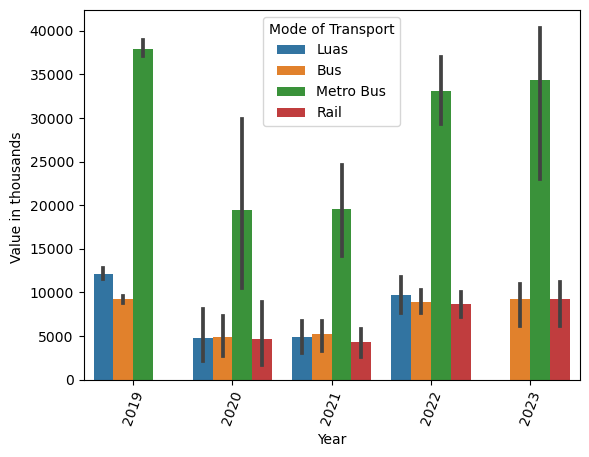

In [412]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Ireland)

plt.ylabel('Value in thousands ')

plt.xticks(rotation=70)

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Value per Year, Quarter, and Mode of Transport')

[Text(0, 0, '2019'),
 Text(1, 0, '2020'),
 Text(2, 0, '2021'),
 Text(3, 0, '2022'),
 Text(4, 0, '2023')]

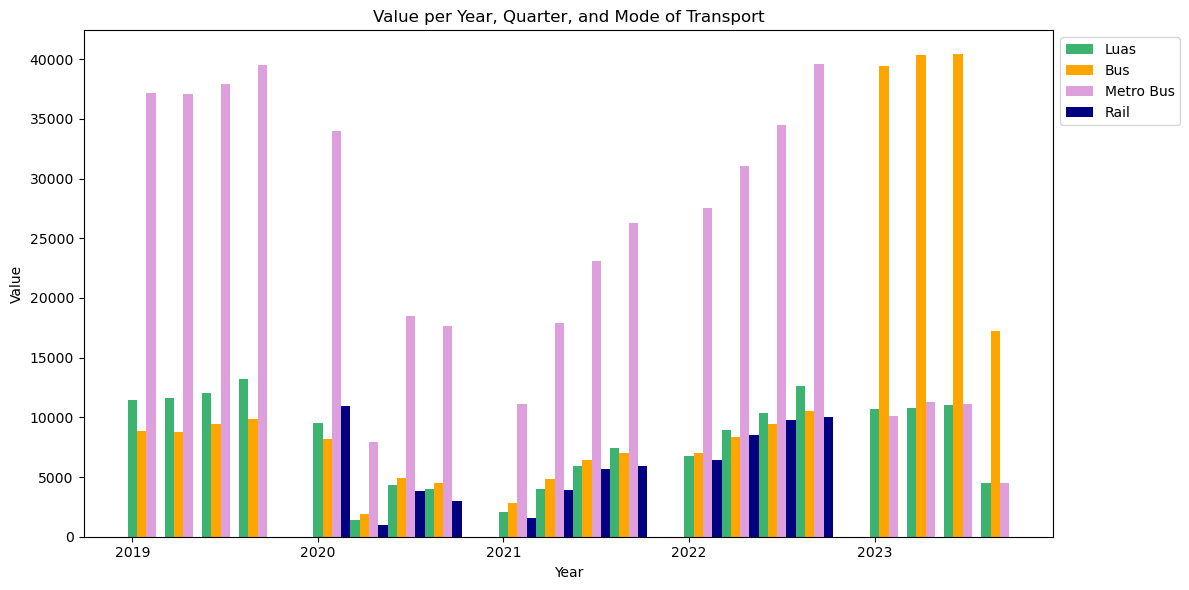

In [413]:
colors = ['mediumseagreen', 'orange', 'plum', 'navy', 'red']

fig, ax = plt.subplots(figsize=(12, 6))

for i, year in enumerate(Ireland['Year'].unique()):
    # Filter data by year
    year_data = Ireland[Ireland['Year'] == year]
    
    # Iterate over quarters
    for j, quarter in enumerate(sorted(year_data['Quarter'].unique())):
        # Filter data by quarter within the current year
        quarter_data = year_data[year_data['Quarter'] == quarter]
        
        # Iterate over modes of transport
        for k, transport_mode in enumerate(quarter_data['Mode of Transport'].unique()):
            # Filter data by mode of transport and quarter
            mode_data = quarter_data[quarter_data['Mode of Transport'] == transport_mode]
            
            # Get the value and plot the corresponding bar
            value = mode_data['VALUE'].sum()
            ax.bar(i + j * 0.2 + k * 0.05, value, width=0.05, color=colors[k], label=transport_mode if i == 0 and j == 0 else None)

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Value per Year, Quarter, and Mode of Transport')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the plot

# Set x-axis labels as years
ax.set_xticks(range(len(Ireland['Year'].unique())))
ax.set_xticklabels(sorted(Ireland['Year'].unique()))

plt.tight_layout()
plt.show()

In [414]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [415]:
# Create an interactive bar chart with Plotly Express
fig = px.bar(Ireland, x='Year', y='VALUE', color='Mode of Transport', 
             animation_frame='Quarter', 
             title='Value per Year, Quarter, and Mode of Transport')

# Show the plot
fig.show()

In [416]:
Ireland['Country'] = 'Ireland'
Ireland

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Luas,K1,11455,Ireland
1,2019,Luas,K2,11580,Ireland
2,2019,Luas,K3,12078,Ireland
3,2019,Luas,K4,13232,Ireland
4,2020,Luas,K1,9520,Ireland
...,...,...,...,...,...
71,2023,Metro Bus,K4,17265,Ireland
72,2023,Rail,K1,10114,Ireland
73,2023,Rail,K2,11277,Ireland
74,2023,Rail,K3,11102,Ireland


In [417]:
mapping = {
    'Luas': 'Tram and suburban railway',
    'Metro Bus':'Bus',
    'Rail': 'Tram and suburban railway',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [418]:
Ireland.head()

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland


In [419]:
# Create an interactive bar chart with Plotly Express
fig = px.bar(Ireland, x='Year', y='VALUE', color='Mode of Transport', 
             animation_frame='Quarter', 
             title='Value per Year, Quarter, and Mode of Transport')

# Show the plot
fig.show()

In [420]:
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
0,Passengers (1 000 passengers),All modes of transportation,Total,185208,166243,154021,189817,147832,78412,104742,...,105964,119821,147908,143175,156600,149507,176612,187085,173702,162879
1,Passengers (1 000 passengers),All modes of transportation,Commercial routs,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,Passengers (1 000 passengers),Bus (Scheduled road transport),Total,111127,97337,89841,115613,91551,49575,65728,...,71174,75073,93229,91748,96026,90117,109149,117465,106997,98617
4,Passengers (1 000 passengers),Bus (Scheduled road transport),Commercial routs,2161,2140,2314,2152,2084,352,1096,...,368,942,1076,962,1432,1730,1347,1090,1400,1457


In [421]:
NRWW= NRWW[NRWW['Type of route'] == 'Public-funded routes']
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
5,Passengers (1 000 passengers),Bus (Scheduled road transport),Public-funded routes,108967,95197,87527,113461,89467,49224,64632,...,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Passengers (1 000 passengers),Boat,Public-funded routes,1990,2528,2730,2124,1570,1235,1852,...,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Passengers (1 000 passengers),Tram and suburban railway,Public-funded routes,50904,45116,42323,50136,36986,20261,27133,...,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549
14,Passengers (1 000 passengers),Railway,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [422]:
NRWW.drop(['Contents', 'Type of route'], axis=1, inplace=True)

In [423]:
NRWW_1=NRWW.drop([2, 14])

In [424]:
NRWW_1

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus (Scheduled road transport),108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Boat,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [425]:
mapping = {
    'Bus (Scheduled road transport)': 'Bus',
    'Boat':'Maritime transportation '}

NRWW_1['Mode of Transport'] = NRWW_1['Mode of Transport'].replace(mapping)

In [426]:
NRWW_1.head()

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus,108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Maritime transportation,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [427]:
NRWW_3= NRWW_1.melt(var_name="Year",value_name="VALUE")
NRWW_3.head()

,Year,VALUE
0,Mode of Transport,Bus
1,Mode of Transport,Maritime transportation
2,Mode of Transport,Tram and suburban railway
3,2019K1,108967
4,2019K1,1990


In [428]:
# Definir la secuencia a repetir
sequence = ['Bus', 'Maritime transportation', 'Tram and suburban railway']

# Obtener la longitud de la secuencia
seq_length = len(sequence)

# Crear la nueva columna con la secuencia repetida
NRWW_3['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NRWW_3))]

# Mostrar el DataFrame con la nueva columna
NRWW_3.head()

,Year,VALUE,Mode of Transport
0,Mode of Transport,Bus,Bus
1,Mode of Transport,Maritime transportation,Maritime transportation
2,Mode of Transport,Tram and suburban railway,Tram and suburban railway
3,2019K1,108967,Bus
4,2019K1,1990,Maritime transportation


In [429]:
NRWW_3 = NRWW_3.drop([0, 1, 2])

In [430]:
NRWW_3[['Year', 'Quarter']] = NRWW_3['Year'].str.extract(r'(\d{4})(K\d)')
NRWW_3.head()

,Year,VALUE,Mode of Transport,Quarter
3,2019,108967,Bus,K1
4,2019,1990,Maritime transportation,K1
5,2019,50904,Tram and suburban railway,K1
6,2019,95197,Bus,K2
7,2019,2528,Maritime transportation,K2


In [431]:
NRWW_3['Country'] = 'Norway'

In [432]:
Transport = pd.concat([Ireland, NRWW_3], ignore_index=True)
Transport

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland
...,...,...,...,...,...
128,2023,Maritime transportation,K2,2430,Norway
129,2023,Tram and suburban railway,K2,44102,Norway
130,2023,Bus,K3,97161,Norway
131,2023,Maritime transportation,K3,2398,Norway


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Normalized VALUE')

Text(0.5, 1.0, 'Normalized VALUE by Index and Year')

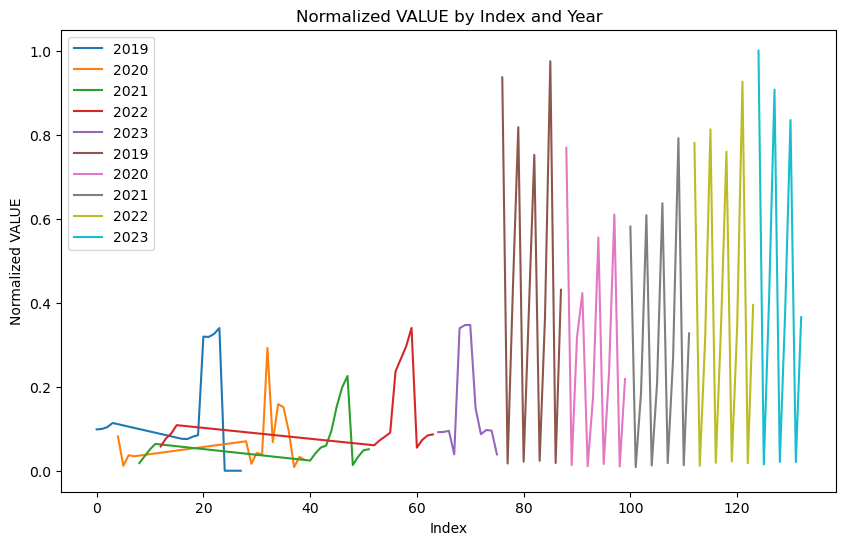

In [433]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Seleccionar solo los datos relevantes para la normalización
relevant_data = Transport[['Year', 'VALUE']]

# Inicializar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar los valores en el rango de 0 a 1
relevant_data['Normalized_VALUE'] = scaler.fit_transform(relevant_data[['VALUE']])

# Graficar los datos normalizados
plt.figure(figsize=(10, 6))
for year in relevant_data['Year'].unique():
    year_data = relevant_data[relevant_data['Year'] == year]
    plt.plot(year_data.index, year_data['Normalized_VALUE'], label=str(year))

plt.xlabel('Index')
plt.ylabel('Normalized VALUE')
plt.title('Normalized VALUE by Index and Year')
plt.legend()
plt.show()

In [434]:
# Create an interactive bar chart with Plotly Express

fig = px.bar(Transport, x='Year', y='VALUE', color='Mode of Transport',
             animation_frame='Quarter', facet_col='Country',
             title='Value per Year, Quarter, and Mode of Transport')

# Show the plot
fig.show()

In [435]:
Transport_Year = Transport.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()
Transport_Year.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Normalized VALUE')

Text(0.5, 1.0, 'Normalized VALUE by Index and Year')

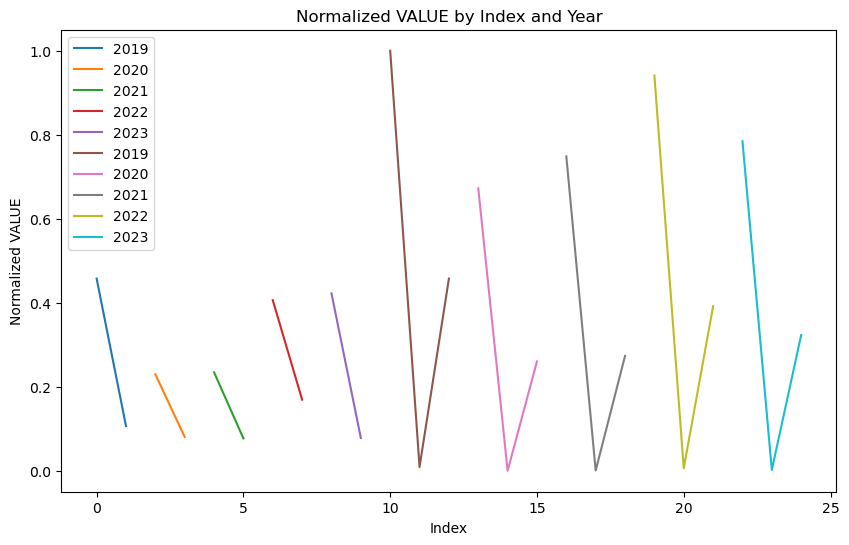

In [436]:
# Seleccionar solo los datos relevantes para la normalización
relevant_data = Transport_Year[['Year', 'VALUE']]

# Inicializar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar los valores en el rango de 0 a 1
relevant_data['Normalized_VALUE'] = scaler.fit_transform(relevant_data[['VALUE']])

# Graficar los datos normalizados
plt.figure(figsize=(10, 6))
for year in relevant_data['Year'].unique():
    year_data = relevant_data[relevant_data['Year'] == year]
    plt.plot(year_data.index, year_data['Normalized_VALUE'], label=str(year))

plt.xlabel('Index')
plt.ylabel('Normalized VALUE')
plt.title('Normalized VALUE by Index and Year')
plt.legend()
plt.show()

<Axes: xlabel='Country,Year'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value in thousands ')

Text(0.5, 1.0, 'Comparison of Transportation by Country per Year')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(Ireland, 2019)'),
  Text(1, 0, '(Ireland, 2020)'),
  Text(2, 0, '(Ireland, 2021)'),
  Text(3, 0, '(Ireland, 2022)'),
  Text(4, 0, '(Ireland, 2023)'),
  Text(5, 0, '(Norway, 2019)'),
  Text(6, 0, '(Norway, 2020)'),
  Text(7, 0, '(Norway, 2021)'),
  Text(8, 0, '(Norway, 2022)'),
  Text(9, 0, '(Norway, 2023)')])

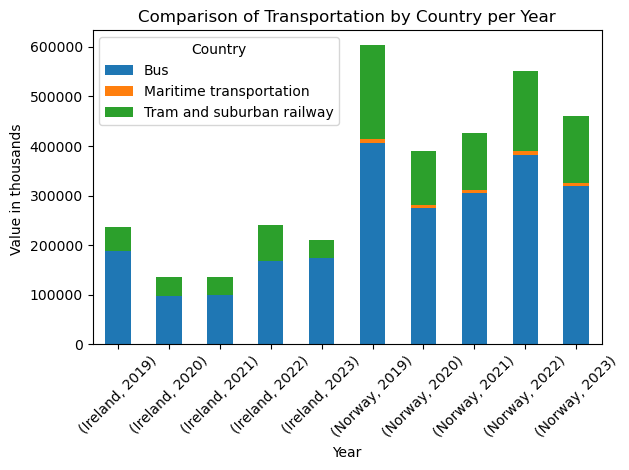

In [437]:

# Group by country and year, summing the transportation values
#grouped = Transport_Year.groupby(['Country', 'Year'])['VALUE'].sum().unstack()
grouped = Transport_Year.groupby(['Country', 'Year', 'Mode of Transport'])['VALUE'].sum().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Value in thousands ')
plt.title('Comparison of Transportation by Country per Year')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Value in thousands ')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022'),
  Text(4, 0, '2023'),
  Text(5, 0, '2019'),
  Text(6, 0, '2020'),
  Text(7, 0, '2021'),
  Text(8, 0, '2022'),
  Text(9, 0, '2023')])

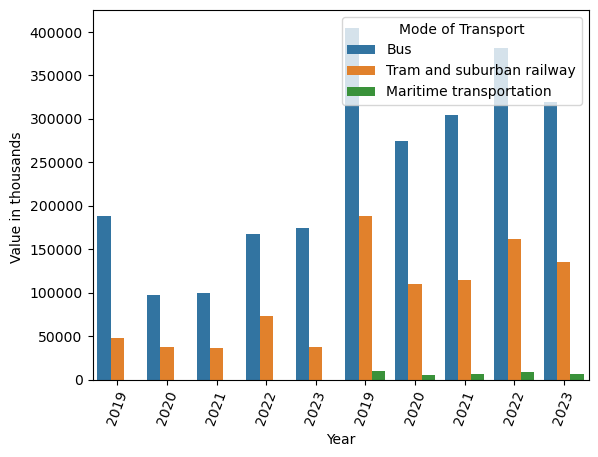

In [438]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Transport_Year)
plt.ylabel('Value in thousands ')
plt.xticks(rotation=70)

In [439]:
NZL

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bus,70.2,77.4,89.1,88.1,87.2,89.3,90.3,93.0,99.1,101.0,100.9,103.7,104.1,108.4,112.3,112.2,113.9,118.3,126.0
1,Train,12.2,12.4,12.5,13.4,14.3,16.4,16.9,18.4,19.5,19.6,21.1,22.2,21.4,23.1,26.1,29.6,32.7,33.7,35.7
2,Ferry,3.5,3.8,4.0,4.0,4.1,4.2,4.2,4.7,4.7,4.9,5.0,5.7,5.8,5.5,5.9,6.2,6.5,6.4,6.7


In [440]:
NZL_1= NZL.melt(var_name="Year",value_name="VALUE")
NZL_1.head()

,Year,VALUE
0,Unnamed: 0,Bus
1,Unnamed: 0,Train
2,Unnamed: 0,Ferry
3,2000,70.2
4,2000,12.2


In [441]:
# Definir la secuencia a repetir
sequence = ['Bus', 'Tram and suburban railway', 'Maritime transportation']

# Obtener la longitud de la secuencia
seq_length = len(sequence)

# Crear la nueva columna con la secuencia repetida
NZL_1['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NZL_1))]

# Mostrar el DataFrame con la nueva columna
NZL_1.head()

,Year,VALUE,Mode of Transport
0,Unnamed: 0,Bus,Bus
1,Unnamed: 0,Train,Tram and suburban railway
2,Unnamed: 0,Ferry,Maritime transportation
3,2000,70.2,Bus
4,2000,12.2,Tram and suburban railway


In [442]:
NZL_1 = NZL_1.drop([0, 1, 2])

In [443]:
NZL_1['VALUE'] = pd.to_numeric(NZL_1['VALUE'], errors='coerce')

In [444]:
NZL_1['VALUE'] = (NZL_1['VALUE'] * 1000).round(2)

In [445]:
NZL_1.info

<bound method DataFrame.info of     Year     VALUE          Mode of Transport
3   2000   70200.0                        Bus
4   2000   12200.0  Tram and suburban railway
5   2000    3500.0    Maritime transportation
6   2001   77400.0                        Bus
7   2001   12400.0  Tram and suburban railway
8   2001    3800.0    Maritime transportation
9   2002   89100.0                        Bus
10  2002   12500.0  Tram and suburban railway
11  2002    4000.0    Maritime transportation
12  2003   88100.0                        Bus
13  2003   13400.0  Tram and suburban railway
14  2003    4000.0    Maritime transportation
15  2004   87200.0                        Bus
16  2004   14300.0  Tram and suburban railway
17  2004    4100.0    Maritime transportation
18  2005   89300.0                        Bus
19  2005   16400.0  Tram and suburban railway
20  2005    4200.0    Maritime transportation
21  2006   90300.0                        Bus
22  2006   16900.0  Tram and suburban railway
23

In [446]:
NZL_1['Year'] = pd.to_numeric(NZL_1['Year'], errors='coerce')
NZL_1['VALUE'] = pd.to_numeric(NZL_1['VALUE'], errors='coerce')

In [447]:
# Calculate linear projection for each mode of transport
newzeland = pd.DataFrame(columns=['Year', 'Mode of Transport', 'VALUE'])

for mode in NZL_1['Mode of Transport'].unique():
    mode_data = NZL_1[NZL_1['Mode of Transport'] == mode]
    x = mode_data['Year'].values.reshape(-1, 1)
    y = mode_data['VALUE'].values.reshape(-1, 1)

    # Perform linear projection for the next 5 years
    next_years = np.arange(NZL_1['Year'].max() + 1, NZL_1['Year'].max() + 6).reshape(-1, 1)
    coef = np.polyfit(x.ravel(), y.ravel(), 1)
    projection = np.polyval(coef, next_years)

    # Append the projection to the DataFrame
    newzeland = newzeland.append(pd.DataFrame({'Year': next_years.ravel(), 'Mode of Transport': [mode] * 5, 'VALUE': projection.ravel()}), ignore_index=True)

# Print the projection
newzeland

,Year,Mode of Transport,VALUE
0,2019,Bus,123992.982456
1,2020,Bus,126473.859649
2,2021,Bus,128954.736842
3,2022,Bus,131435.614035
4,2023,Bus,133916.491228
5,2019,Tram and suburban railway,33905.263158
6,2020,Tram and suburban railway,35184.210526
7,2021,Tram and suburban railway,36463.157895
8,2022,Tram and suburban railway,37742.105263
9,2023,Tram and suburban railway,39021.052632


In [448]:
newzeland['VALUE'] = newzeland['VALUE'].round(2)

In [449]:
newzeland['Country'] = 'Newzeland'
newzeland

,Year,Mode of Transport,VALUE,Country
0,2019,Bus,123992.98,Newzeland
1,2020,Bus,126473.86,Newzeland
2,2021,Bus,128954.74,Newzeland
3,2022,Bus,131435.61,Newzeland
4,2023,Bus,133916.49,Newzeland
5,2019,Tram and suburban railway,33905.26,Newzeland
6,2020,Tram and suburban railway,35184.21,Newzeland
7,2021,Tram and suburban railway,36463.16,Newzeland
8,2022,Tram and suburban railway,37742.11,Newzeland
9,2023,Tram and suburban railway,39021.05,Newzeland


In [463]:
Transport_1 = pd.concat([Transport_Year, newzeland], ignore_index=True)
Transport_1.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


In [460]:
# Create an interactive bar chart with Plotly Express

fig = px.line(Transport_1, x='Year', y='VALUE', color='Mode of Transport', facet_row='Country',
              title='Evolución por año en cada país y modo de transporte')

# Show the plot
fig.show()

In [462]:
# Create a dynamic plot using Plotly Express
fig = px.line(Transport_1, x='Year', y='VALUE', color='Country', facet_col='Mode of Transport',
              title='Quantity evolution per year for each mode of transport')

fig.update_yaxes(title_text='Value in thousands ')


# Connect to MySQL server

In [ ]:
!pip install mysql-connector-python

In [13]:
import mysql.connector

In [14]:
host="localhost"
user="Transport2023."
password="Transport2023"
port=3306

In [15]:
# Connect to MySQL server
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password
)
print(db)

In [37]:
"DROP DATABASE students"

'DROP DATABASE students'

In [29]:
"DROP TABLE testtestirelandireland.ireland;"

'DROP TABLE testtestirelandireland.ireland;'

In [46]:
conn = db.cursor()

# The .execute method lets us run MySQL commands
# CREATE SCHEMA testDB would do the exact same thing
# conn.execute("CREATE DATABASE students")

# IF NOT EXISTS means we can rerun this and not get an error if the database already exists
conn.execute("CREATE DATABASE IF NOT EXISTS students;")

In [47]:
conn.execute("CREATE DATABASE IF NOT EXISTS Ireland;")

In [48]:
conn.execute("SHOW DATABASES;")

# Any results from our querys will be stored in the conn object
for result in conn:
    print(result)

('information_schema',)
('booksdb',)
('booksdbx',)
('buyhouse2',)
('ireland',)
('mysql',)
('performance_schema',)
('students',)
('sys',)


In [50]:
# We can tell the MySQL server which database to use
conn.execute("USE Ireland;")

In [51]:
conn.close()

True

In [62]:
# Or we can connect directly to the database
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database = "Ireland"
)
print(db)
conn = db.cursor()

In [63]:
conn.execute("CREATE TABLE IF NOT EXISTS test (Trasport INT);")

In [64]:
conn.execute("CREATE TABLE IF NOT EXISTS Ireland (name VARCHAR(255), age INT, studentNum INT PRIMARY KEY);")

In [65]:
conn.execute("SHOW TABLES;")
for result in conn:
    print(result)

('ireland',)
('students',)
('test',)


In [66]:
conn.execute("INSERT INTO Ireland (name, age, studentNum) VALUES ('Joe', 45, 123);")

In [67]:
# Will give an error - why?
#conn.execute("INSERT INTO students (name, age, studentNum) VALUES (Joe, 45, 123);")

In [69]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [73]:
conn.close()

True

In [80]:
db = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database = "Ireland"
)
print(db)
conn = db.cursor()

In [81]:
# No result??
conn.execute("SELECT * FROM Ireland;")
for result in conn:
    print(result)

In [82]:
conn.execute("INSERT INTO students (name, age, studentNum) VALUES ('Joe', 45, 124);")

IntegrityError: 1062 (23000): Duplicate entry '124' for key 'PRIMARY'

In [83]:
# Need to commit the changes to save them
db.commit()

In [78]:
conn.execute("SELECT * Ireland;")
for result in conn:
    print(result)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'Ireland' at line 1

In [ ]:
conn.execute("ALTER TABLE students ADD COLUMN programme VARCHAR(255);")

In [ ]:
conn.execute("UPDATE students SET programme = 'MSc Data Analytics' WHERE name = 'Joe';")

In [ ]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [18]:
sql = "INSERT INTO students (name, age, studentNum, programme) VALUES (%s, %s, %s, %s)"
vals = [
    ('Alice', 63, 125, 'MSc Data Analytics'),
    ('Bob', 47, 126, 'BSc Computing and IT'),
]

conn.executemany(sql, vals)
db.commit()

NameError: name 'conn' is not defined

In [ ]:
conn.execute("SELECT * FROM students")
for result in conn:
    print(result)

In [ ]:
conn.execute("SELECT * FROM students WHERE programme = 'MSc Data Analytics'")
for result in conn
    print(result)

In [1]:
sql= "DROP TABLE students"

In [2]:
sql= "DROP TABLE Ireland"

# The Reddit API in Python

In [1]:
Student_ID='veHSPVYokVw3TpbJYLp-tg'
Secret_Key='MsCwheYHaqabzyeRtcWx40HIQVSrgg'

In [2]:
import requests

In [3]:
auth= requests.auth.HTTPBasicAuth(Student_ID, Secret_Key)

In [4]:
with open('pw.txt','r') as f:
    pw= f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'pw.txt'

In [ ]:
data={
    'grant_type':'password'
    'username':'Transport2023API',
    'password':
}

In [ ]:
hea